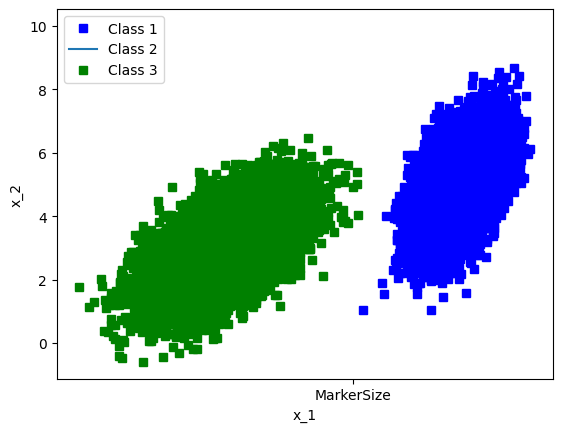

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

# In the following we sample from Gaussian distribution to generate 3 clusters
L = 10000;

mu_1 = np.array([5, 5]); # mean 
Sigma_1 = np.array([[1, 0.5],[ 0.5, 1]]); # covariance
X_1 = np.random.multivariate_normal(mu_1,Sigma_1,L); # drawing samples from 2D Gaussian ditribution

mu_2 = np.array([-2, -4]);
Sigma_2 = np.array([[3, 0], [0, 1]]);
X_2 = np.random.multivariate_normal(mu_2,Sigma_2,L);

mu_3 = np.array([-6, 3]);
Sigma_3 = np.array([[3, 1], [1, 1]]);
X_3 = np.random.multivariate_normal(mu_3,Sigma_3,L);


#figure
plt.plot(X_1[:,0],X_1[:,1],'bs','MarkerSize',10)
plt.plot(X_3[:,0],X_3[:,1],'gs','MarkerSize',10)
#plt.plot(X_2[:,0],X_2[:,1],'rs','MarkerSize',10) 

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.show

# Classification (2 classes)
C_1 = np.matlib.repmat([0,1],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([1,0],L,1); # generate labels for Class 2

C = np.concatenate((C_1,C_2))
X = np.concatenate((X_1,X_2))

# data set containing two classes
data_set = np.concatenate([X,C],1); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 

rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.

# Data_set is a 20000x4 with
# x_1,x_2,c_1,c_2

In [ ]:
# My code!
percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

W =  np.array([np.zeros(len(train_dataset)+1),np.zeros(len(train_dataset)+1),np.zeros(len(train_dataset)+1)]).T
t = train_dataset[:,2]
eta = 0.09
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T

t_calc = np.zeros(len(t))
for k in range(len(t)):
    p_C1 = 1/(1 + np.exp(W[k]@x[k].T))
    if p_C1 > 1-p_C1:
        t_calc[k]=1
    else:
        t_calc[k] = 0 
    e = (p_C1-t[k])*x[k]
    W[k+1] = W[k] + eta*e


plt.plot(W)
plt.xlabel('Iterations')
plt.legend(['$W_{0}$','$W_{1}$','$W_{2}$'])


x_test = np.array([np.ones(len(test_dataset)),test_dataset[:,0],test_dataset[:,1]]).T

classification_errors = 0
for i, classification in enumerate(t):
    if t_calc[i] == classification:
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    

print(f'The number of classification errors with logistic regression is: {classification_errors}')


The number of classification errors with logistic regression is: 0


Text(0.5, 1.0, 'Weigths')

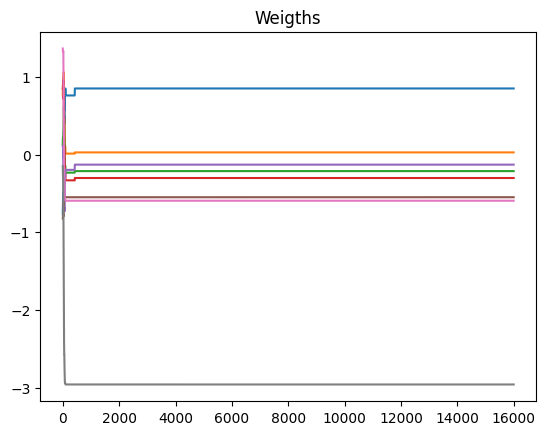

In [75]:
def sigmoid(x):
    return 1/(1 + np.exp(x))

def der_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

sigma = 1

percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]


eta = 0.09
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T

W_ji= np.random.normal(0,sigma,(4,3))
W_kj = np.random.normal(0,sigma,(1,5))
#x = np.column_stack([np.ones(50),np.linspace(-1,1,50)])
W1 = []
W2 = []
for i in range(len(x)):
    W1.append(W_kj)
    W2.append(W_ji)
    x_i = x[i].reshape((1,3))

    aj = (W_ji @ x_i[0])
    zj = np.hstack((1,1/(1 + np.exp(aj))))

    yk = W_kj@zj
    if yk > 1-yk:
        t_calc=1
    else:
        t_calc = 0 
    dk = t_calc - t[i]
    dj = (der_sigmoid(zj)*W_kj*dk.T)[:,1:]   

    W_ji = W_ji - eta*dj.T@x_i
    W_kj = W_kj - eta*dk*zj

x = np.array([np.ones(len(test_dataset)),test_dataset[:,0],test_dataset[:,1]]).T
aj = (W_ji @x.T)
zj = np.vstack([np.ones(len(aj[0])),(1/(1 + np.exp(aj)))])
yk = W_kj@zj
yk = yk[0]
t_test = []
for i,input in enumerate(yk):
    if yk[i] > 1-yk[i]:
        t_test.append(1)
    else:
        t_test.append(0)  

classification_errors = 0
t = test_dataset[:,2]
for i, classification in enumerate(t):
    if t_test[i] == classification:
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    

print(f'The number of classification errors with logistic regression is: {classification_errors}')
W1 = np.array(W1)
W2 = np.array(W2)
W1 = W1[:,0,:]
W2 = W2[:,0,:]
plt.plot(W1)
plt.plot(W2)
plt.title('Weigths')

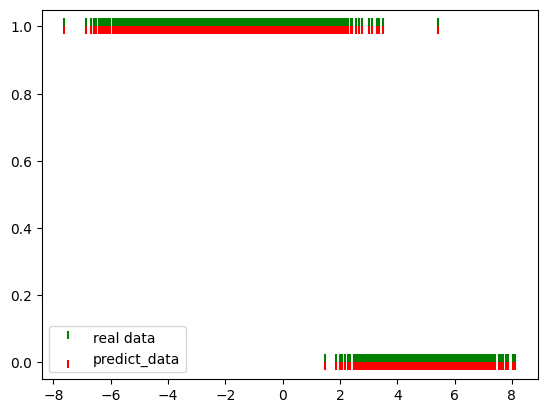

In [77]:
plt.scatter(test_dataset[:,0],t,color='g',marker=2)
plt.scatter(test_dataset[:,0],t_test,color='red',marker=3)
plt.legend(['real data','predict_data'])